In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('/content/Global_REE_occurrence_nonspatial_table-2.csv')

In [ ]:
#so i can see what exactly the column names are
list(df)

['OBJECTID',
 'ID_No',
 'Name',
 'Name_Other',
 'Components',
 'Part_of',
 'Rec_Type',
 'Rec_Note',
 'Country',
 'State_Prov',
 'Latitude',
 'Longitude',
 'Loc_Note',
 'Dep_Type',
 'Dep_Note',
 'Dep_Form',
 'Commods',
 'HREE_Note',
 'LREE_Note',
 'REE_Ratio',
 'REE',
 'Status',
 'Stat_Note',
 'REE_Mins',
 'Sig_Mins',
 'Oth_Mins',
 'Age_Mzn',
 'Age_Ma',
 'Host_Age',
 'HAge_Ma',
 'Host_Lith',
 'Host_Unit',
 'Assoc_Rock',
 'Alteration',
 'Company',
 'Comments',
 'Ref_List',
 'Discov_Yr',
 'Expl_Note',
 'Mine_Meth',
 'P_Status',
 'PStat_Note',
 'P_Years',
 'P_Refs',
 'P_Note',
 'RR_Ore_Mt',
 'RR_TREO_Mt',
 'RR_TREOgrd',
 'RR_REE_grd',
 'RR_Cutoff',
 'RR_HM_Mt',
 'RR_HM_pct',
 'RR_min_MT',
 'RR_min_pct',
 'RR_mon_Mt',
 'RR_mon_pct',
 'RR_oth_grd',
 'RR_Yr_Est',
 'RR_Refs',
 'RR_RegCode',
 'RR_Note',
 'Region']

In [ ]:
df['Site_Type']=df['REE_Mins'].apply(lambda x: 'REE Site' if pd.notnull(x) else 'Non-REE Site')
df[['Region', 'REE_Mins', 'Site_Type']].head()

,Region,REE_Mins,Site_Type
0,China,NaN,Non-REE Site
1,Africa,eudialyte,REE Site
2,China,NaN,Non-REE Site
3,China,xenotime,REE Site
4,Russian Federation,"samarskite, euxenite-(Y), gadolinite",REE Site


In [ ]:
# Count of REE and Non-REE sites per continent
contingency= pd.crosstab(df['Region'], df['Site_Type'])
print(contingency)

Site_Type                  Non-REE Site  REE Site
Region                                           
Africa                               14        53
Australia and New Zealand            33        41
China                               211        59
East Asia                            24        72
Europe                               18        44
Middle East                           8         0
North America                        63        33
Oceania                               0         1
Russian Federation                   14        32
South America                        13        32
South and Central Asia               13        42


In [ ]:
chi2, p_value, dof, expected = chi2_contingency(contingency)

print(f"Chi-squared statistic: {chi2:.4f}")
print(f"Degrees of freedom: {dof}")
print(f"P-value: {p_value:.4f}")
print("\nExpected frequencies:")
print(pd.DataFrame(expected, index=contingency.index, columns=contingency.columns))

Chi-squared statistic: 192.7678
Degrees of freedom: 10
P-value: 0.0000

Expected frequencies:
Site_Type                  Non-REE Site    REE Site
Region                                             
Africa                        33.581707   33.418293
Australia and New Zealand     37.090244   36.909756
China                        135.329268  134.670732
East Asia                     48.117073   47.882927
Europe                        31.075610   30.924390
Middle East                    4.009756    3.990244
North America                 48.117073   47.882927
Oceania                        0.501220    0.498780
Russian Federation            23.056098   22.943902
South America                 22.554878   22.445122
South and Central Asia        27.567073   27.432927


In [ ]:
alpha=0.05
if p_value < alpha:
  print("Reject the null hypothesis: There is an association between the region/continent and the site type (REE vs. Non-REE sites)")
else:
  print("Fail to reject the null hypothesis: There is no association between the region/continent and the site type (REE vs. Non-REE sites).")

Reject the null hypothesis: There is an association between the region/continent and the site type (REE vs. Non-REE sites)


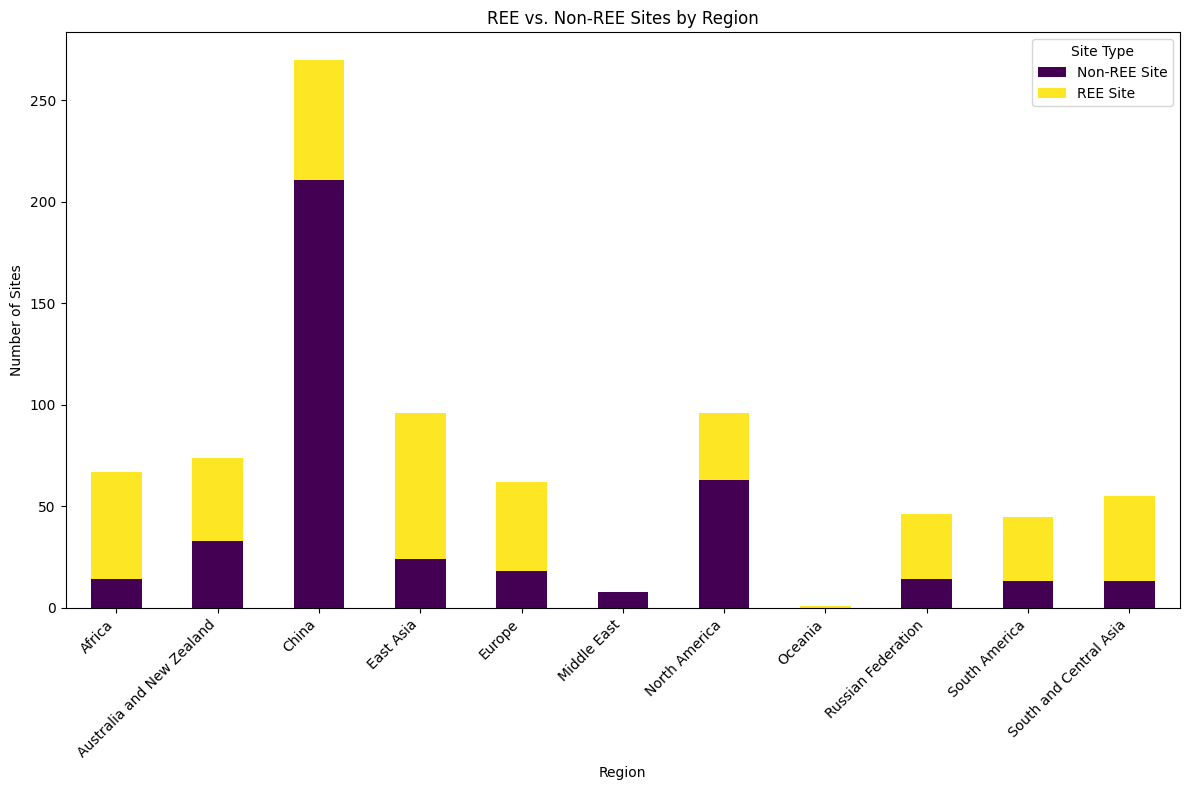

In [ ]:
# Plotting a stacked bar chart
contingency.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='viridis')

plt.title('REE vs. Non-REE Sites by Region')
plt.xlabel('Region')
plt.ylabel('Number of Sites')
plt.legend(title='Site Type')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

##Second Part
lines 9-23 are Ibrahim D's work

In [ ]:
df2=pd.read_csv('/content/updated_cleaned_ree_data.csv')

In [ ]:
list(df2)

['Project No.',
 'Deposit No.',
 'Company Name',
 'Project Name',
 'Location',
 'Continent',
 'Status (2022), 1: Exploration/ Define resource; 2: Feasibility/ Pre-feasibility; 3: Construction; 4: Production; S: Suspending mining; T: Test of Metallurgical; D: Development licence; N: Not Use',
 'Deposit type',
 'Resource (*10^4 t, REO, Total)',
 'Grade (wt. %)',
 'La2O3',
 'Ce2O3',
 'Pr6O11',
 'Nd2O3',
 'Sm2O3',
 'Eu2O3',
 'Gd2O3',
 'Tb4O7',
 'Dy2O3',
 'Ho2O3',
 'Er2O3',
 'Tm2O3',
 'Yb2O3',
 'Lu2O3',
 'Y2O3',
 'HREE percentage',
 'REE pattern Ref.',
 'Project and status Ref.',
 'Deposit type Ref.',
 'Resource and grade Ref.']

In [ ]:
# Prices per kg in USD for each REO
prices = {
    "La2O3": 0,         # Optional: use 0 if not relevant
    "Ce2O3": 0,         # Optional: use 0 if not relevant
    "Pr6O11": 95.70,
    "Nd2O3": 95.70,
    "Sm2O3": 1.945,
    "Eu2O3": 23.71,
    "Gd2O3": 30.00,     # Average value
    "Tb4O7": 796.52,
    "Dy2O3": 201.87,
    "Ho2O3": 56.91
}

# Convert all relevant columns to numeric just in case
df2["Resource (*10^4 t, REO, Total)"] = pd.to_numeric(df2["Resource (*10^4 t, REO, Total)"], errors='coerce')
for oxide in prices.keys():
    df2[oxide] = pd.to_numeric(df2[oxide], errors='coerce')

# Calculate total scaled value
df2["Total Scaled Value"] = 0  # Initialize the column

for oxide, price in prices.items():
    df2["Total Scaled Value"] += (
        df2["Resource (*10^4 t, REO, Total)"] * df2[oxide] * 10000 * price
    )

In [ ]:
print(df2['Total Scaled Value'])

0     7.454625e+09
1     6.810700e+09
2     1.452166e+08
3     1.397196e+09
4     2.226007e+10
          ...     
64    3.311103e+10
65             NaN
66             NaN
67             NaN
68             NaN
Name: Total Scaled Value, Length: 69, dtype: float64


In [ ]:
df2.head()

,Project No.,Deposit No.,Company Name,Project Name,Location,Continent,"Status (2022), 1: Exploration/ Define resource; 2: Feasibility/ Pre-feasibility; 3: Construction; 4: Production; S: Suspending mining; T: Test of Metallurgical; D: Development licence; N: Not Use",Deposit type,"Resource (*10^4 t, REO, Total)",Grade (wt. %),...,Tm2O3,Yb2O3,Lu2O3,Y2O3,HREE percentage,REE pattern Ref.,Project and status Ref.,Deposit type Ref.,Resource and grade Ref.,Total Scaled Value
0,1.0,1.0,Lynas Rare Earths,Mount Weld,"Mount Weld, Australia",Australia,4,Carbonatite,300.00,5.40,...,0.012683917,0.063420,0,1.775748,3.970066,"Paulick and Machacek ,2017","Lynas, Annual Report 2021, https://lynasrareea...","Lynas, Lynas Rare Earths Limited CLSA Explorat...","Lynas, Lynas Rare Earths Limited CLSA Explorat...",7.454625e+09
1,2.0,2.0,MP Materials,Mountain Pass,"Central Mojave Desert, California, America",North America,4,Carbonatite,418.30,8.90,...,0.015229973,0.015230,0.015229973,0.106610,0.487359,"Paulick and Machacek ,2017",https://mpmaterials.com/about/,"Long, K.R., Van Gosen, B.S., Foley, N.K., and ...","Long, K.R., Van Gosen, B.S., Foley, N.K., and ...",6.810700e+09
2,3.0,3.0,Iluka Resources Limited,Eneabba,"Eneabba, Western Australia, Australia",Australia,4,Placer,7.29,0.09,...,0.067454059,0.439415,0.052035988,6.422911,10.080206,"Jaireth et al., 2014, OGR","ILUKA, ENEABBA MINERAL SANDS RECOVERY PROJECT ...","ILUKA, ENEABBA MINERAL SANDS RECOVERY PROJECT ...","ILUKA, ENEABBA MINERAL SANDS RECOVERY PROJECT ...",1.452166e+08
3,5.0,5.0,Australian Strategic Materials,Dubbo (Toongi),"Dubbo, New South Wales, Australia",Australia,4(2022),Alkaline rock,55.63,0.74,...,0.112485939,1.012373,0.112485939,15.860517,23.059618,"Paulick, H., & Machacek, E. (2017). The global...",https://asm-au.com/dubbo-project-overview/reso...,"Spandler, C., & Morris, C. (2016). Geology and...","Australian Strategic Materials, Annual Report ...",1.397196e+09
4,6.0,6.0,Greenland Minerals Limited,"Kvanefjeld (Ilimaussaq:Kvanefjeld, Zone 3, Sør...","Narsaq, Greenland",Greenland,2,Alkaline rock,1114.00,1.10,...,0.092592593,0.462963,0.185185185,7.870370,11.759259,"Paulick, H., & Machacek, E. (2017). The global...",https://ggg.gl/project/geology-and-resource/?P...,https://ggg.gl/project/geology-and-resource/,"Greenland Minerals Limited, Positioning Greenl...",2.226007e+10


In [ ]:
gdp_df=pd.read_csv('/content/Country_GDP_and_Population_Data.csv')

In [ ]:
gdp_df.head()

,Country,GDP (Million USD),Population (Million)
0,China,17734000,1412000000
1,United States,23100000,331000000
2,India,3266000,1380000000
3,Brazil,1869000,213000000
4,Russia,1763000,143000000


In [ ]:
gdp_df[['Country','GDP (Million USD)']]

,Country,GDP (Million USD)
0,China,17734000
1,United States,23100000
2,India,3266000
3,Brazil,1869000
4,Russia,1763000
5,Canada,2050000
6,Australia,1600000
7,South Korea,1800000
8,Mexico,1300000
9,United Kingdom,3135000


In [ ]:
# Get the top 10 REE sites by Total Scaled Value
top_10_ree_sites = df2.sort_values("Total Scaled Value", ascending=False).head(20)

# Check the top 10 REE sites
top_10_ree_sites[["Continent","Location", "Total Scaled Value"]]

,Continent,Location,Total Scaled Value
58,Asia,China,2.104292e+11
6,Greenland,"Kujalleq, Greenland",7.407427e+10
64,Asia,China,3.311103e+10
4,Greenland,"Narsaq, Greenland",2.226007e+10
46,Europe,"Murmansk, Russia",1.503996e+10
42,Asia,"Lai Chau, Vietnam",1.486991e+10
5,Africa,"Longonjo, Angola",1.072906e+10
40,North America,"Northern Quebec, Canada",1.065346e+10
14,Africa,southern Tanzania,9.914809e+09
9,Europe,southern norway,9.528386e+09


In [ ]:
countries=['China', 'Russia', 'Vietnam', 'South Africa', 'Canada', 'Tanzania', 'Norway', 'Brazil', 'Australia', "United States"]
total_scaled_values=[
   2.104292e+11, #China
   1.503996e+10, #Russia
   1.486991e+10, #Vietnam
   1.072906e+10, #South Africa (Angola)
   1.065346e+10, #Canada
   9.914809e+09, #Tanzania
   9.528386e+09, #Norway
   9.312972e+09, #Brazil
   7.454625e+09, #Australia
   6.810700e+09, #United States
]

gdp_values = [
    17734000, #China
    1763000,  #Russia
    450000,   #Vietnam
    399000,   #South Africa
    2050000,  #Canada
    67000,    #Tanzania
    450000,   #Norway
    1869000,  #Brazil
    1600000,  #Australia
    23100000, #United States
]

#DataFrame with the Top 10 countries, Total Scaled Values, and GDPs
manual_df = pd.DataFrame({
    "Country": countries,
    "Total Scaled Value": total_scaled_values,
    "GDP": gdp_values
})

print(manual_df)

         Country  Total Scaled Value       GDP
0          China        2.104292e+11  17734000
1         Russia        1.503996e+10   1763000
2        Vietnam        1.486991e+10    450000
3   South Africa        1.072906e+10    399000
4         Canada        1.065346e+10   2050000
5       Tanzania        9.914809e+09     67000
6         Norway        9.528386e+09    450000
7         Brazil        9.312972e+09   1869000
8      Australia        7.454625e+09   1600000
9  United States        6.810700e+09  23100000


Got this dataframe by manually looking at top Ree sites and comparing it to the GDP info that we had available. Skipped any countries that did not have a listed GDP, I did not want to deviate from the given data from the project. Even though Greenland is a top listed REE_site, I feel confident that this was the right decision to exclude it from the manual dataset to get this correlation.

In [ ]:
correlation = manual_df["Total Scaled Value"].corr(manual_df["GDP"])
print(f"Correlation between REE value and GDP: {correlation:.4f}")

Correlation between REE value and GDP: 0.5247


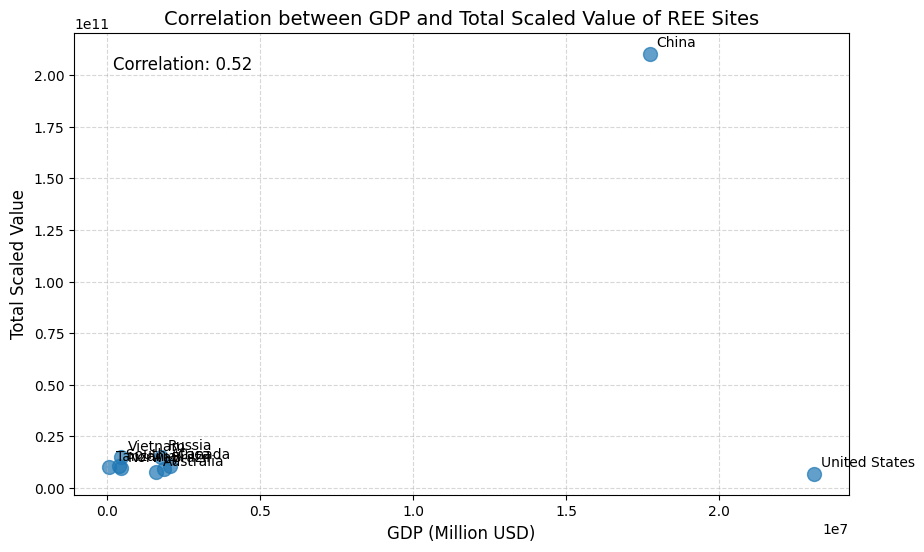

In [ ]:

import matplotlib.pyplot as plt

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(manual_df["GDP"], manual_df["Total Scaled Value"], s=100, alpha=0.7)  # Increased marker size and added transparency

# Customize the plot
plt.title("Correlation between GDP and Total Scaled Value of REE Sites", fontsize=14)
plt.xlabel("GDP (Million USD)", fontsize=12)
plt.ylabel("Total Scaled Value", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.5)

# Add labels for each data point
for i, txt in enumerate(manual_df["Country"]):
    plt.annotate(txt, (manual_df["GDP"][i], manual_df["Total Scaled Value"][i]), textcoords="offset points", xytext=(5,5), ha='left')

# Display the correlation coefficient on the plot
correlation = manual_df["Total Scaled Value"].corr(manual_df["GDP"])
plt.text(0.05, 0.95, f"Correlation: {correlation:.2f}", transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')

plt.show()
